問題１
アルファベットa, b, c, …, zに対応する数値は1, 2, 3, …, 26とし、例え
ば、文字列catのハッシュ値は3+1+20 % 11 = 2となるようなハッシュ
関数を作成し、文字列dogのハッシュ値を計算しなさい

In [ ]:
def hash_string(s: str) -> int:
    # a→1, b→2, ... , z→26 に変換して合計し、11で割った余りを返す
    total = 0
    for ch in s:
        # 小文字前提。'a' のコードを 1 にしたいので +1 する
        value = ord(ch) - ord('a') + 1
        total += value
    return total % 11


print(hash_string("dog"))


4


資料にあるチェーン法で作るハッシュ表プログラムに基づいて、与えら
れたキーを探索する関数と、与えられたキーをもつデータ項目を削除
する関数を追加しなさい。そして、キー30, 35, 5, 10, 3 を挿入した結
果を示し、また10を削除した後の表を示しなさい。

In [3]:
class Hash:
    C = 5  # バケット数

    class _Node:
        def __init__(self, item, next_node):
            self._item = item
            self._next = next_node

    def __init__(self):
        # バケット用の配列（チェーンの先頭ノードを入れる）
        self._data = [None] * Hash.C

    def h(self, key):
        # 簡単なハッシュ関数：key を 5 で割った余り
        n = key % Hash.C
        return n

    def insert_hash(self, key):
        # 先頭挿入でチェインに追加
        new = self._Node(key, None)
        i = self.h(key)
        new._next = self._data[i]
        self._data[i] = new
        
    def search_hash(self, key):
        #キー key を探索し、見つかればノードを返し、なければ None を返す
        i = self.h(key)
        p = self._data[i]
        while p is not None:
            if p._item == key:
                return p
            p = p._next
        return None

    def delete_hash(self, key):
        #キー key を削除する。削除できたら True、見つからなければ False を返す
        i = self.h(key)
        p = self._data[i]
        prev = None
        while p is not None:
            if p._item == key:
                # 先頭を消す場合
                if prev is None:
                    self._data[i] = p._next
                else:
                    prev._next = p._next
                return True
            prev = p
            p = p._next
        return False


    def show_hash(self):
        for i in range(0, Hash.C):
            print('Hash[{}]:'.format(i), '', end='')
            if self._data[i] is not None:
                item = self._data[i]
                while item is not None:
                    print(item._item, '', end='')
                    item = item._next
            print()


h = Hash()
for x in [30, 35, 5, 10, 3]:
    h.insert_hash(x)
h.show_hash()

print()
h.delete_hash(10)
h.show_hash()



Hash[0]: 10 5 35 30 
Hash[1]: 
Hash[2]: 
Hash[3]: 3 
Hash[4]: 

Hash[0]: 5 35 30 
Hash[1]: 
Hash[2]: 
Hash[3]: 3 
Hash[4]: 


資料にあるダブルハッシュ法プログラムにあるデータ削除関数を完成
しなさい。0から200までにランダムに5個の整数キーを生成し、ハッシ
ュ表に追加した後の結果を示し、また、１つのデータを削除した後の表
を示しなさい。

In [4]:
import random

class Hash:
    C = 7          
    Q = 5          
    del_flag = -1  

    def __init__(self):
        self.data = [None] * Hash.C

    def hash1(self, key):
        return key % Hash.C

    def hash2(self, key):
        return Hash.Q - (key % Hash.Q)

    def insert(self, key):
        hash_val = self.hash1(key)      
        step_size = self.hash2(key)     

        while (self.data[hash_val] is not None and
               self.data[hash_val] != Hash.del_flag):
            hash_val = (hash_val + step_size) % Hash.C  

        self.data[hash_val] = key

    # データ削除（ダブルハッシュ法）
    def delete(self, key):
        hash_val = self.hash1(key)      # 基本位置
        step_size = self.hash2(key)     # ステップ幅

        # 無限ループ防止のため最大 C 回まで探索
        count = 0
        # None（完全に空）になるまで探す
        while self.data[hash_val] is not None and count < Hash.C:
            # 削除したいキーを発見したとき
            if self.data[hash_val] == key:
                deleted = self.data[hash_val]
                self.data[hash_val] = Hash.del_flag
                return deleted          # 削除したデータを返す

            # 見つからなければ次の候補位置へ
            hash_val = (hash_val + step_size) % Hash.C
            count += 1

        # 見つからなかった場合
        return None

    # ハッシュ表の中身を表示する補助関数
    def show(self):
        for i, v in enumerate(self.data):
            print(f" {i}: {v}")
        print()



h = Hash()

random.seed(0)

keys = [random.randint(0, 200) for _ in range(5)]
print(keys)
print()

for k in keys:
    h.insert(k)
h.show()

delete_key = keys[0]
deleted = h.delete(delete_key)

h.show()


[98, 194, 107, 10, 66]

 0: 98
 1: None
 2: 107
 3: 10
 4: 66
 5: 194
 6: None

 0: -1
 1: None
 2: 107
 3: 10
 4: 66
 5: 194
 6: None



４半円を描くプログラムを完成し、実行結果を示しなさ
い。ただし、0<=x, y <= 1であり、x^2+y^2 >=1 とx^2+y^2<1は
異なる点で表すこと。

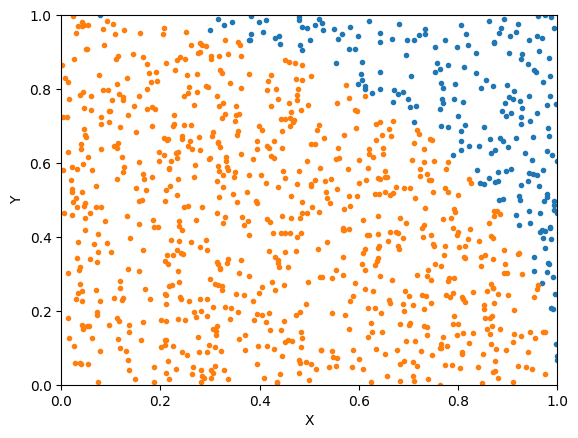

In [12]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

x = np.random.rand(1000)  # create 1000 X-points
y = np.random.rand(1000)  # create 1000 Y-points

# ここを完成しなさい：半径1の円の内外を判定
r2 = x**2 + y**2          # x^2 + y^2
inside = r2 < 1           # 円の内側 (x^2 + y^2 < 1)
outside = r2 >= 1         # 円の外側 (x^2 + y^2 >= 1)

plt.figure(1)  # 新しいウィンドウを描く
plt.clf()      # 図をクリア

# ここを完成しなさい：内側と外側を異なる点で描画
plt.plot(x[outside], y[outside], '.' )  # 外側
plt.plot(x[inside], y[inside], '.')  # 内側

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()  # 図の描画
